In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from surprise import SVD, Reader, Dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/edsa-movie-recommendation-predict/sample_submission.csv
/kaggle/input/edsa-movie-recommendation-predict/movies.csv
/kaggle/input/edsa-movie-recommendation-predict/imdb_data.csv
/kaggle/input/edsa-movie-recommendation-predict/genome_tags.csv
/kaggle/input/edsa-movie-recommendation-predict/genome_scores.csv
/kaggle/input/edsa-movie-recommendation-predict/train.csv
/kaggle/input/edsa-movie-recommendation-predict/test.csv
/kaggle/input/edsa-movie-recommendation-predict/tags.csv
/kaggle/input/edsa-movie-recommendation-predict/links.csv


In [2]:
!pip install surprise

In [3]:
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))


Function for Data Visualization

1. Visualize the distribution of ratings
2. the distribution of ratings per user
3. distribution of ratings per movie




# 1. Data Loading

In [4]:
ratings = pd.read_csv("/kaggle/input/edsa-movie-recommendation-predict/train.csv")
movies = pd.read_csv("/kaggle/input/edsa-movie-recommendation-predict/movies.csv")

# 2. Data Exploration

Checking for missing values

In [5]:
print(ratings.isnull().sum())
print(movies.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
movieId    0
title      0
genres     0
dtype: int64


Check for duplicate values

In [6]:
print(ratings.duplicated().sum())
print(movies.duplicated().sum())

0
0


# 3. Data Cleaning

In [7]:
ratings = ratings.dropna()
ratings = ratings.drop_duplicates()
movies = movies.dropna()
movies = movies.drop_duplicates()

checking for missing values after cleaning

In [8]:
print(ratings.isnull().sum())
print(movies.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
movieId    0
title      0
genres     0
dtype: int64


Checking for duplicate values after cleaning

In [9]:
print(ratings.duplicated().sum())
print(movies.duplicated().sum())

0
0


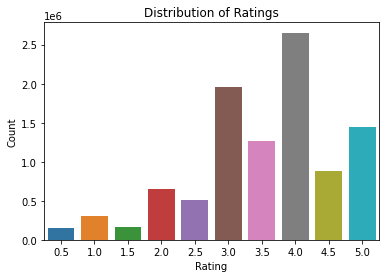

In [10]:
# Visualize the distribution of ratings
sns.countplot(data=ratings, x='rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

Defining the rating scale

In [11]:
reader = Reader(rating_scale=(0.5, 5.0))

In [12]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader=reader)

# 4. Data Preparation

In [13]:
train, test = train_test_split(ratings, test_size=0.2, random_state=42)
reader = Reader(rating_scale=(1, 5))
data_train = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)





# 5. Modeling

In [14]:
algo = SVD()

In [15]:
algo.fit(data_train.build_full_trainset())

# 6. Evaluation

In [16]:
y_pred = [algo.predict(test.iloc[i]['userId'], test.iloc[i]['movieId']).est for i in range(len(test))]


Calculate the RMSE

In [17]:
y_true = test['rating']
print("RMSE: ", rmse(y_true, y_pred))

RMSE:  0.8337645356664979
